## Avocado Project

### Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data set
df = pd.read_csv(r"D:\Assignments\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Here we can see our data set contains 18,249 rows and 14 columns respectively.

### About Columns:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

These are our column names present in the data set.

#### To predict:
1- Region

2- AveragePrice

### Exploratory Data Analysis (EDA)

In [3]:
#Checking the shape of the data set
df.shape

(18249, 14)

In [4]:
#Checking for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see there are no null values in our data set as for now.

Here 'Unnamed: 0' column seems of no use so let's remove it.

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
#Let's check if it has been removed or not
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


It has been successfully removed. We can move ahead.

In [7]:
#Checking for columns
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
#Checking for data types
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The data set contains 3 object data, 1 int data and 9 float data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


It gives information about column names, count, non-null values, data types, memory usage, etc.

In [10]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

There are no white spaces in our data set.

In [11]:
#Checking for unique values in year
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [12]:
#Checking for unique values in type
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


It gives statistical imformation about numerical columns such as count, mean, standard deviation, min, max, 25%, 50% and 75% quantiles.

In [14]:
#Checking for categorical columns
cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical columns:", cat_col)
print("\n")


Categorical columns: ['Date', 'type', 'region']




Our data set contains some categorical data as well. Let's convert it to numerical.

#### Converting categorical column into numerical using Ordinal Encoder

In [5]:
#Encoding categorical column using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df        

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,50.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,49.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,48.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,47.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,160.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,159.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,158.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


### Data Visualization

In [16]:
#Checking for correlation
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


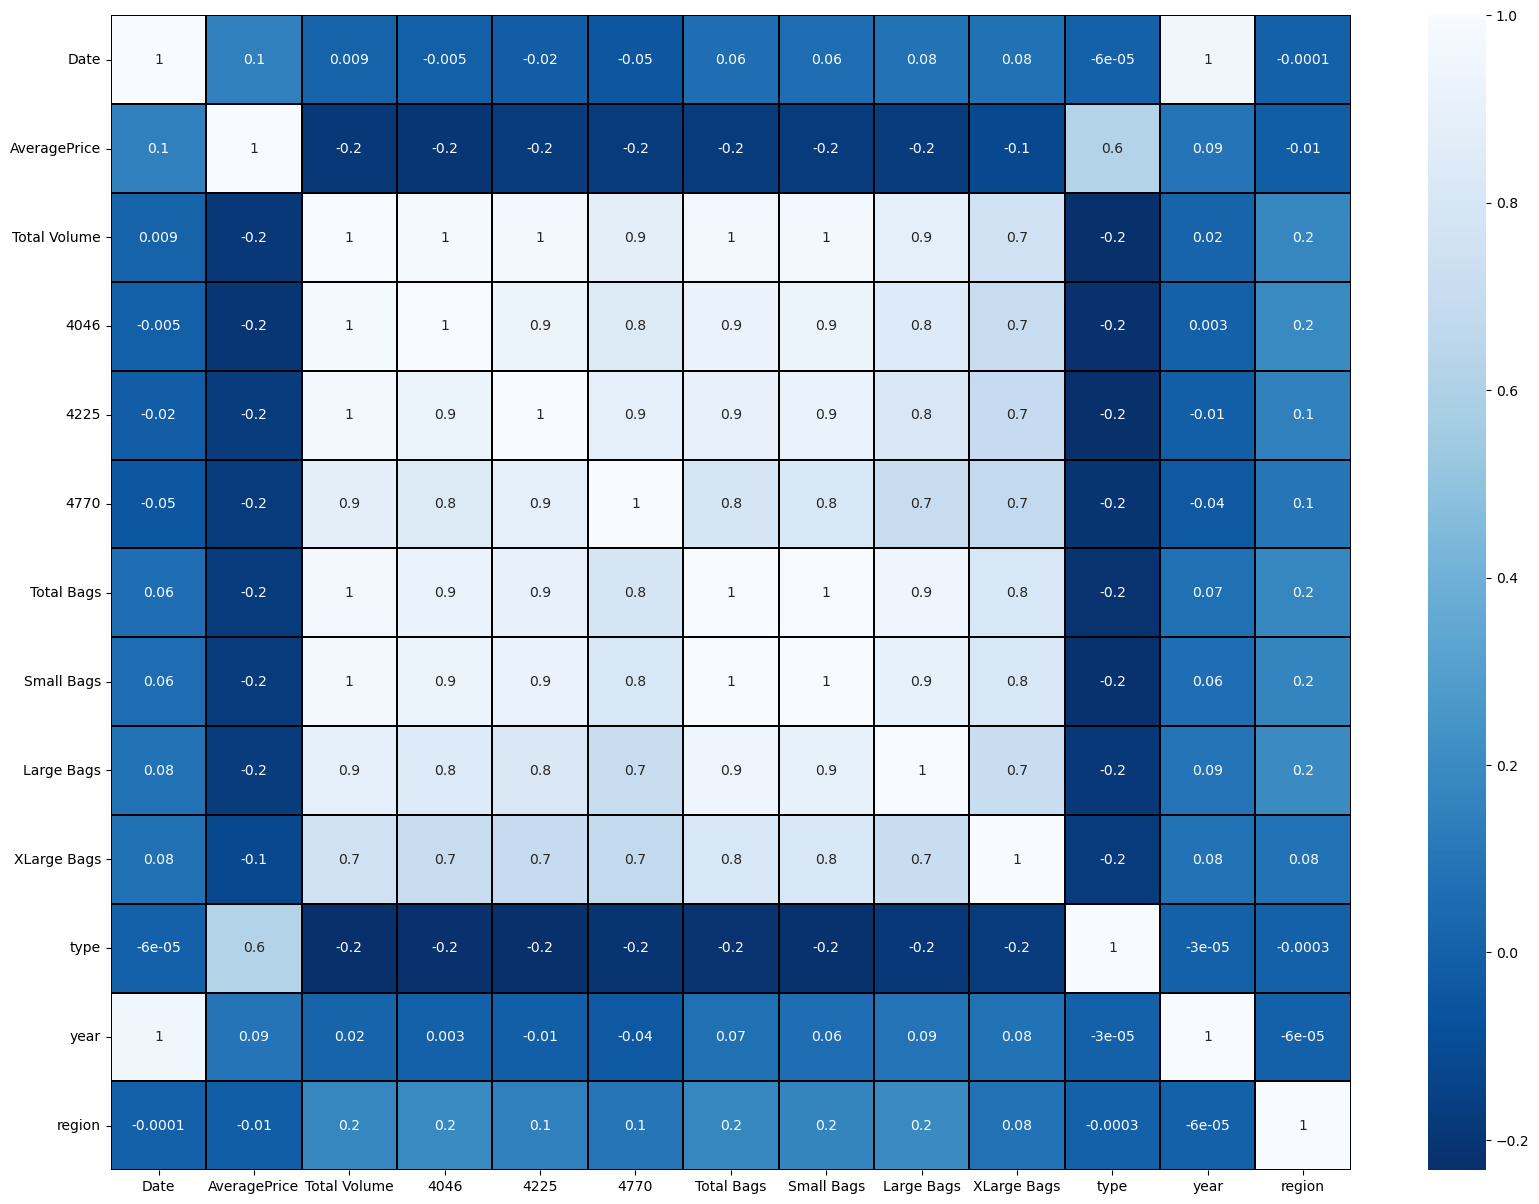

In [17]:
#Visualizing correlation by plotting a heatmap
plt.figure(figsize = (20, 15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation=0)
plt.show()

This indicates that there is a high correlation between the features.

<Axes: xlabel='type', ylabel='AveragePrice'>

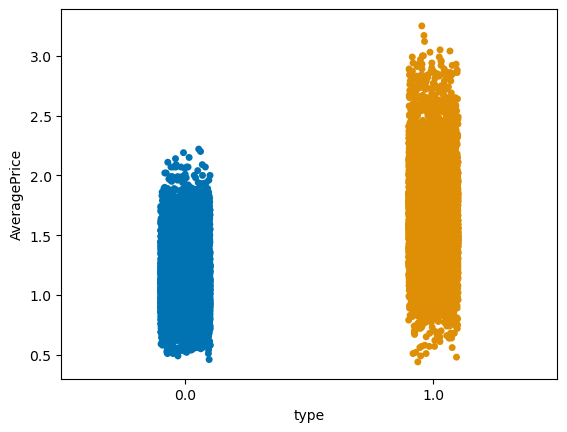

In [18]:
#Comparing AveragePrice with type
sns.stripplot(x='type', y='AveragePrice', data=df, palette='colorblind')

We can see that the average price remains the same w.r.t type of avocado.

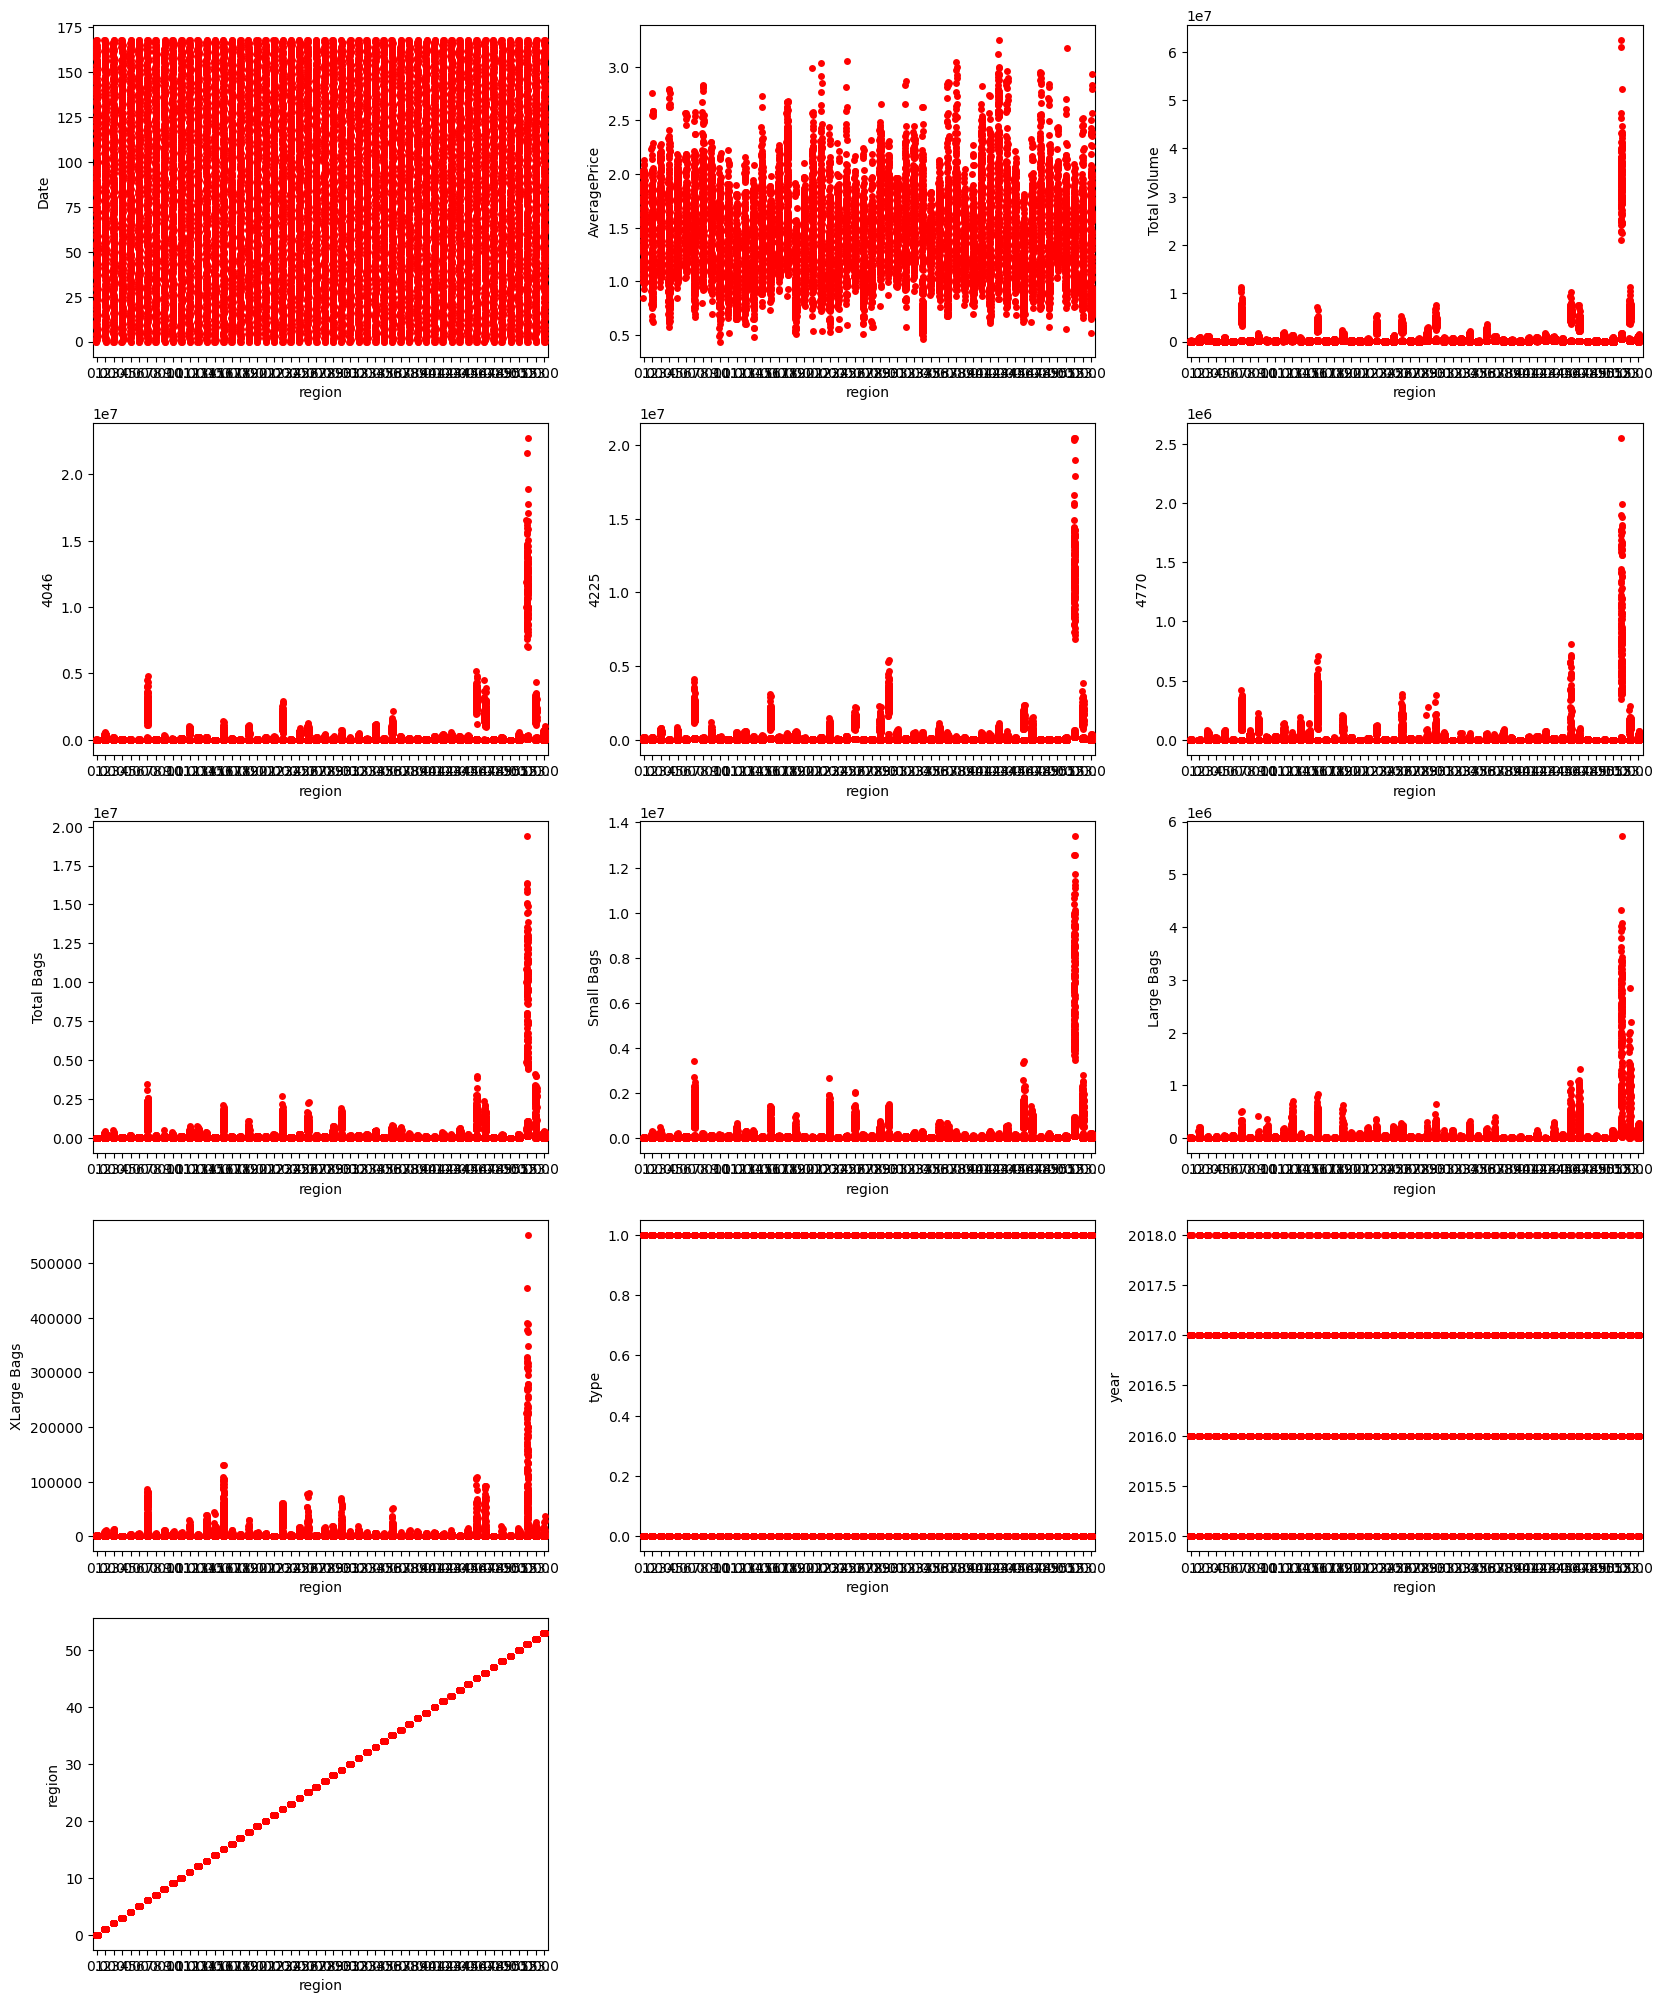

In [19]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,3,p)
        sns.stripplot(x='region', y=i, data=df, color='r')
        plt.xlabel("region")
        plt.ylabel(i)
        p+=1
plt.show()        

We can remove Date as it is of no use.

In [6]:
df.drop('Date', axis=1, inplace=True)

In [7]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0


#### Checking for outliers

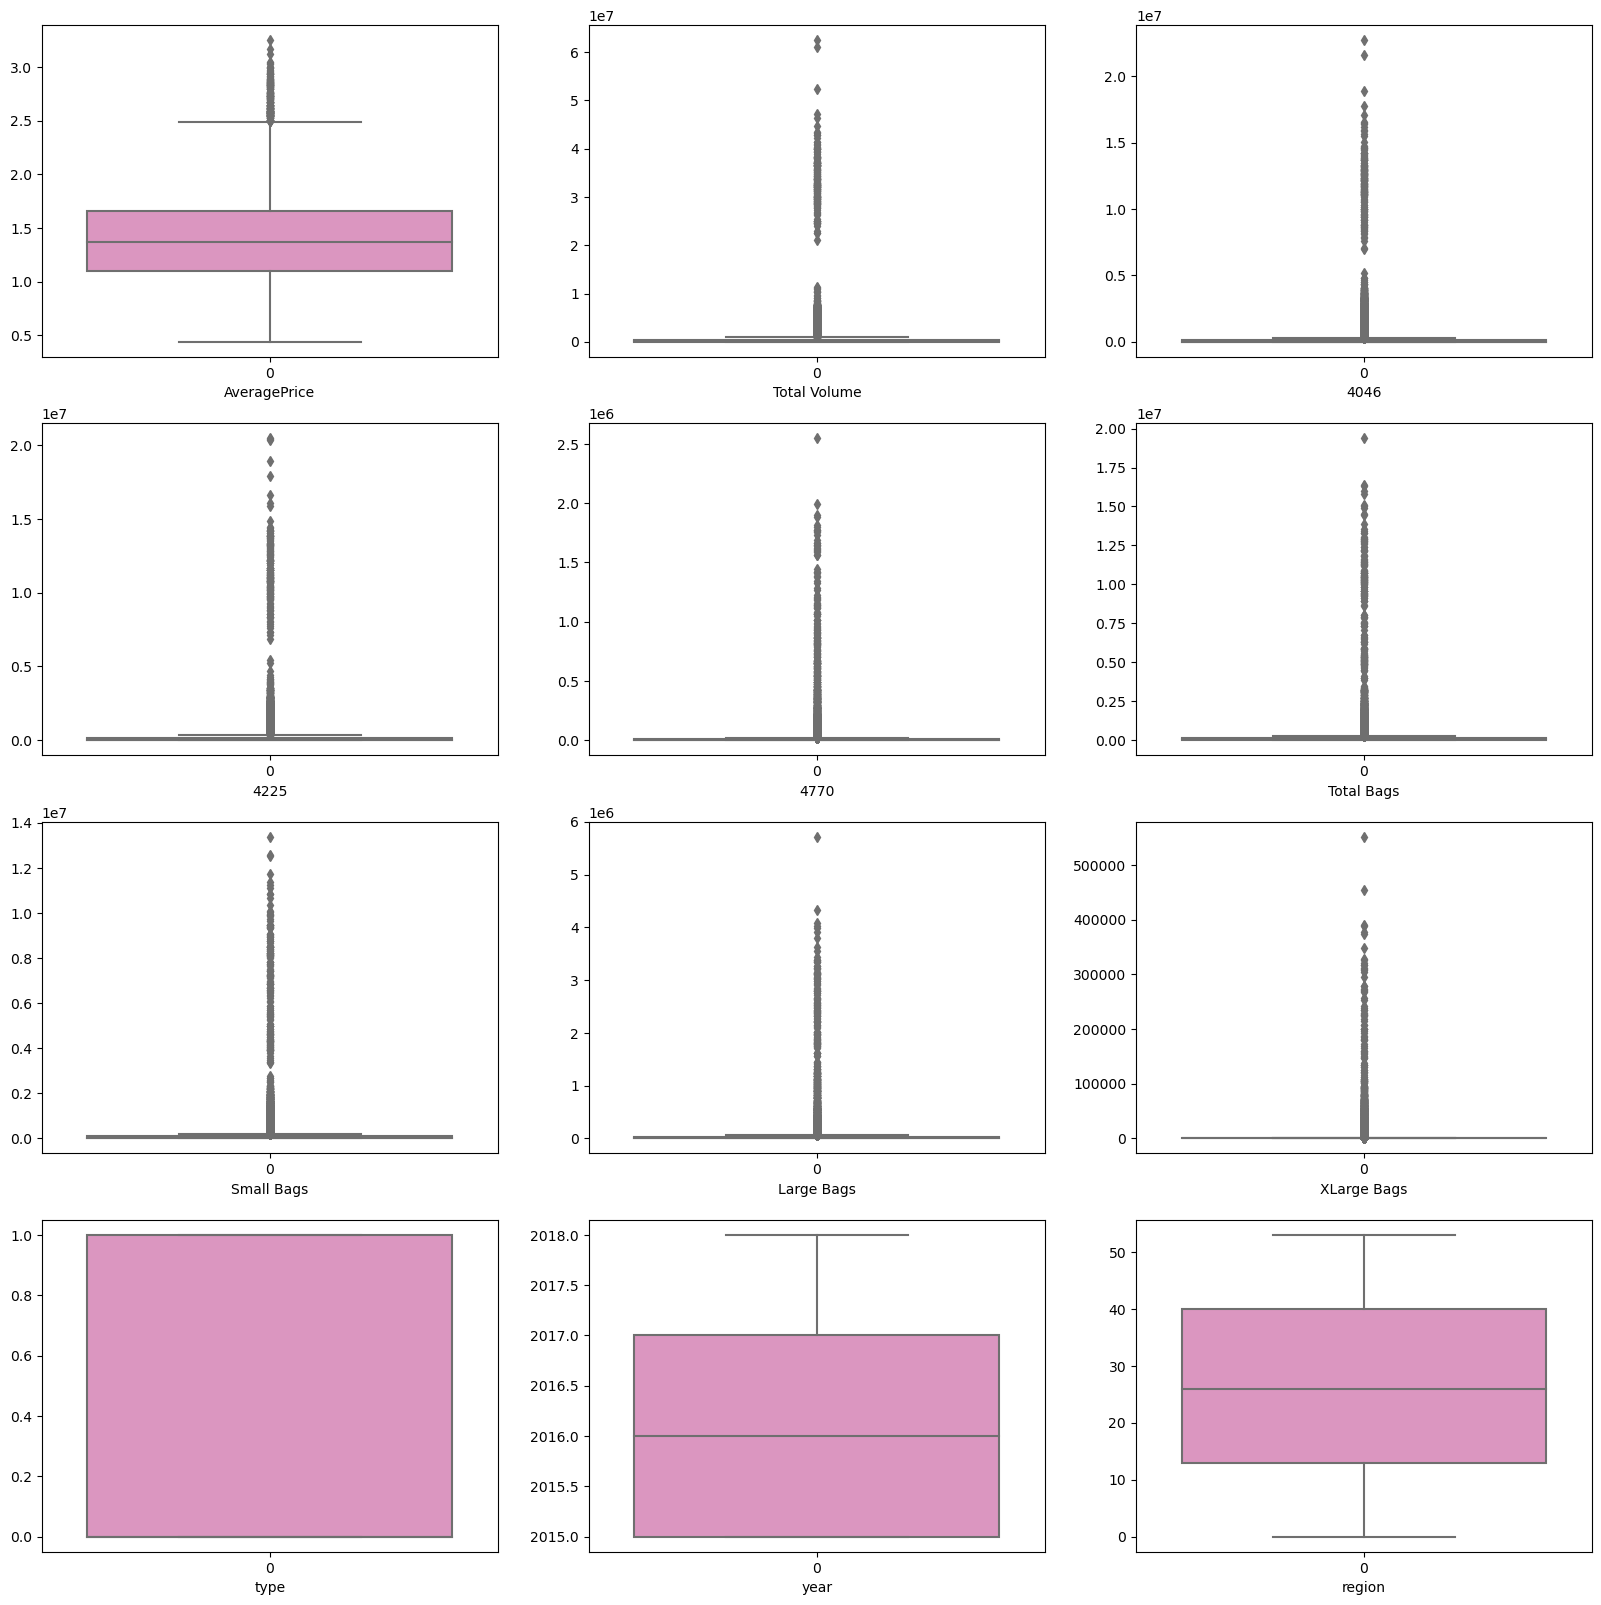

In [9]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,3,p)
        sns.boxplot(df[i], palette='Set2_r')
        plt.xlabel(i)
        p+=1
plt.show()        

We can see there are a lot of outliers in our data set. Let's deal with them.

Before removing outliers first let's use z score method and IQR techniques.

In [10]:
from scipy.stats import zscore
out_features = df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
z = np.abs(zscore(out_features))
z

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [11]:
#Thresholds
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [12]:
z.iloc[346,2]

3.199410614794124

In [13]:
#Removing the data above Zscore and creating new df
df1= df[(z<3).all(axis=1)]
df1.shape

(17651, 12)

In [14]:
#Shape of old and new dataframe
print('Shape of Old dataframe :', df.shape)
print('Shape of New dataframe :', df1.shape)

Shape of Old dataframe : (18249, 12)
Shape of New dataframe : (17651, 12)


In [15]:
print("Data Loss Percentage :", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage : 3.276891884486821


In [16]:
df=df1

Since the data loss percentage is 3.27 which is affordable, now we can move ahead.

#### IQR Method

In [17]:
#Let's check with IQR method
#1st quantile
Q1 = out_features.quantile(0.25)

#3rd quantile
Q3 = out_features.quantile(0.75)

#IQR
IQR = Q3 - Q1

df2 = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
df2.shape

(11538, 12)

In [19]:
print("Data Loss Percentage after removing outliers with IQR method :", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method : 34.63259871961928


So, now our data loss percentage is 34% which is also acceptable, let's proceed further.

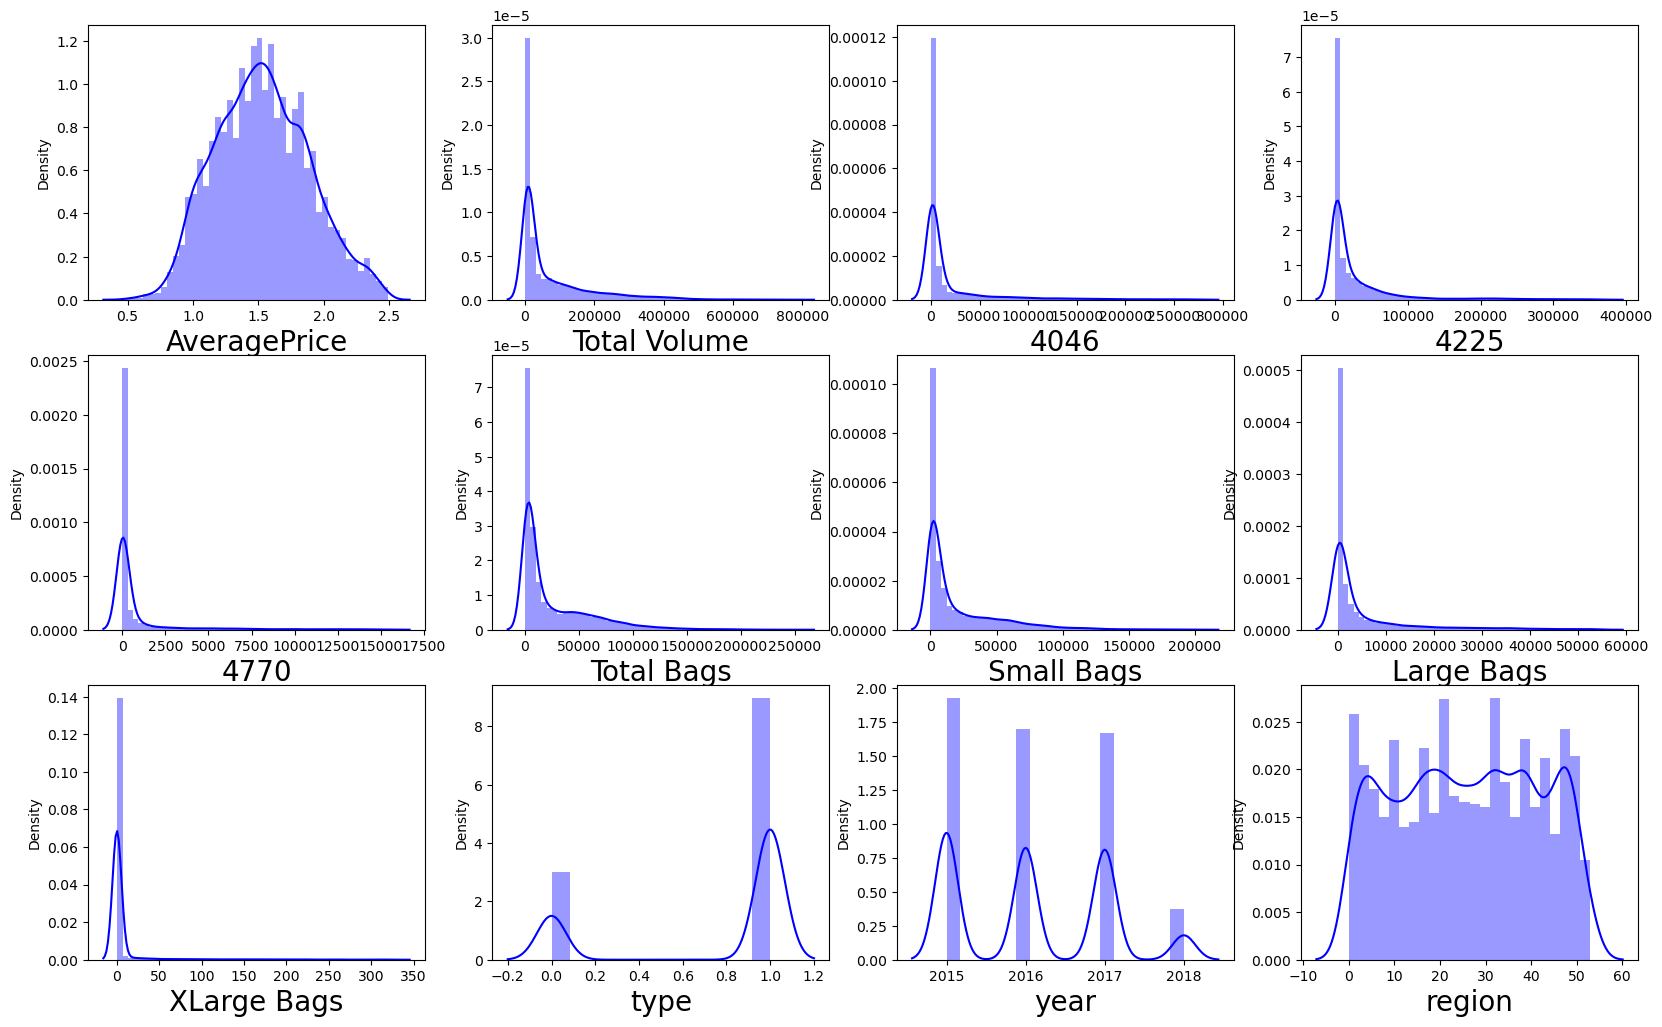

In [21]:
#Checking how the data is distributed in each column
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber=1

for column in df2:
    if plotnumber<=12:
        ax = plt.subplot(6,4, plotnumber)
        sns.distplot(df2[column], color='b')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()    
 

We can see a lot of skewness in the data set. Let's deal with them.

In [22]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [25]:
#There are still some skewness left let's remove them
df['Total Volume'] = np.cbrt(df['Total Volume'])

df['4046'] = np.cbrt(df['4046'])

df['4225'] = np.cbrt(df['4225'])

df['4770'] = np.cbrt(df['4770'])

df['Total Bags'] = np.cbrt(df['Total Bags'])

df['Small Bags'] = np.cbrt(df['Small Bags'])

df['Large Bags'] = np.cbrt(df['Large Bags'])

df['XLarge Bags'] = np.cbrt(df['XLarge Bags'])

In [24]:
#Let's check
df.skew()

AveragePrice    0.377432
Total Volume    1.963864
4046            2.497504
4225            2.128505
4770            2.636658
Total Bags      2.010691
Small Bags      2.093752
Large Bags      2.236756
XLarge Bags     3.312484
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

In [23]:
#Removing skewness using transformation method
df['Total Volume'] = np.sqrt(df['Total Volume'])

df['4046'] = np.sqrt(df['4046'])

df['4225'] = np.sqrt(df['4225'])

df['4770'] = np.sqrt(df['4770'])

df['Total Bags'] = np.sqrt(df['Total Bags'])

df['Small Bags'] = np.sqrt(df['Small Bags'])

df['Large Bags'] = np.sqrt(df['Large Bags'])

df['XLarge Bags'] = np.sqrt(df['XLarge Bags'])

In [26]:
df.skew()

AveragePrice    0.377432
Total Volume    0.551005
4046            0.570377
4225            0.384279
4770            0.411758
Total Bags      0.436523
Small Bags      0.273120
Large Bags      0.018991
XLarge Bags     1.308244
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

We have successfully removed the skewness from the dataset. Let's proceed further.

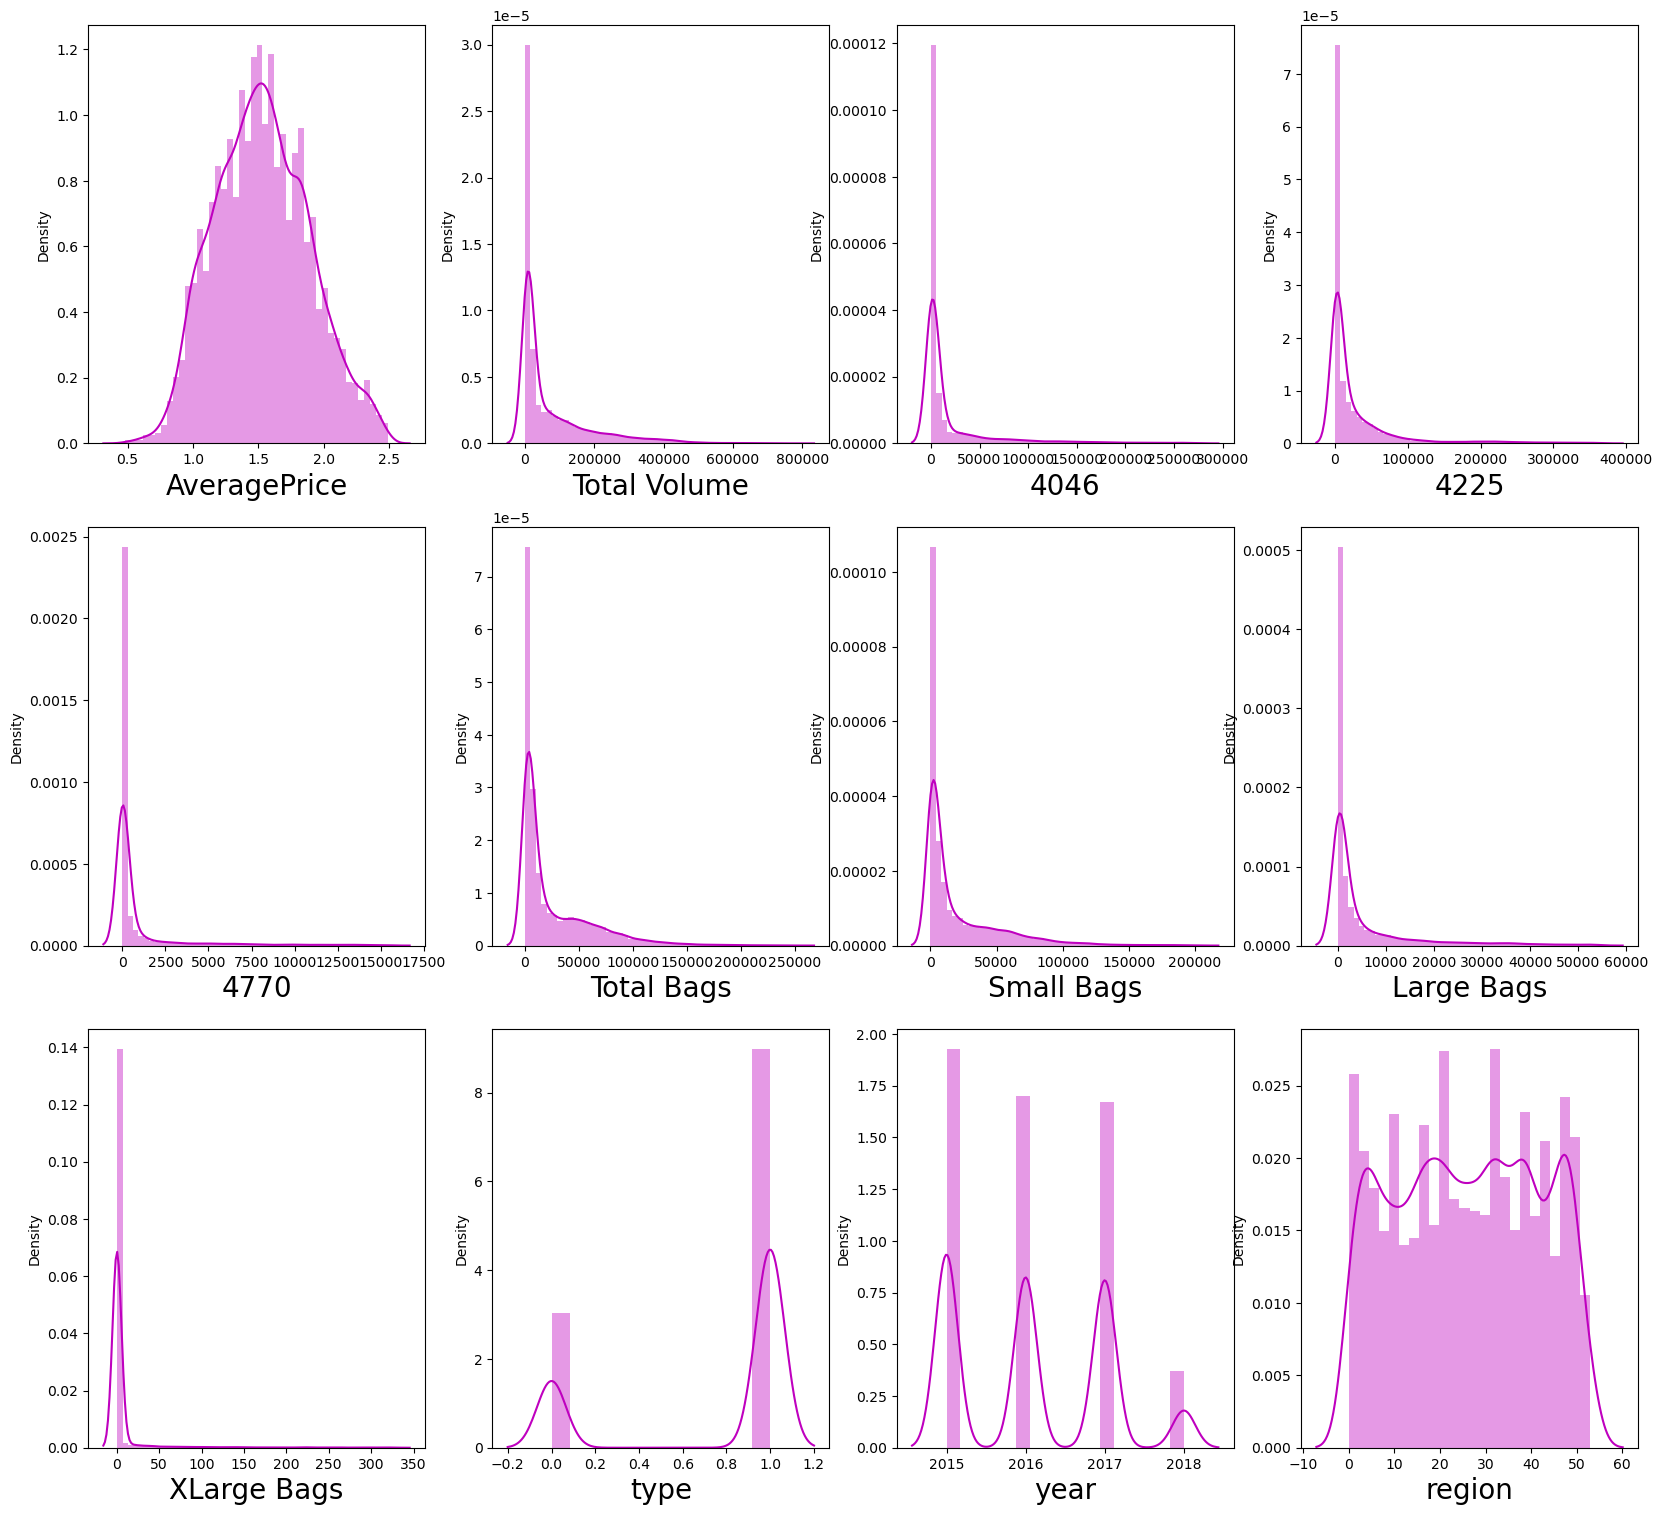

In [27]:
#Let's visualize again
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber=1

for column in df2:
    if plotnumber<=12:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(df2[column], color='m')
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()    


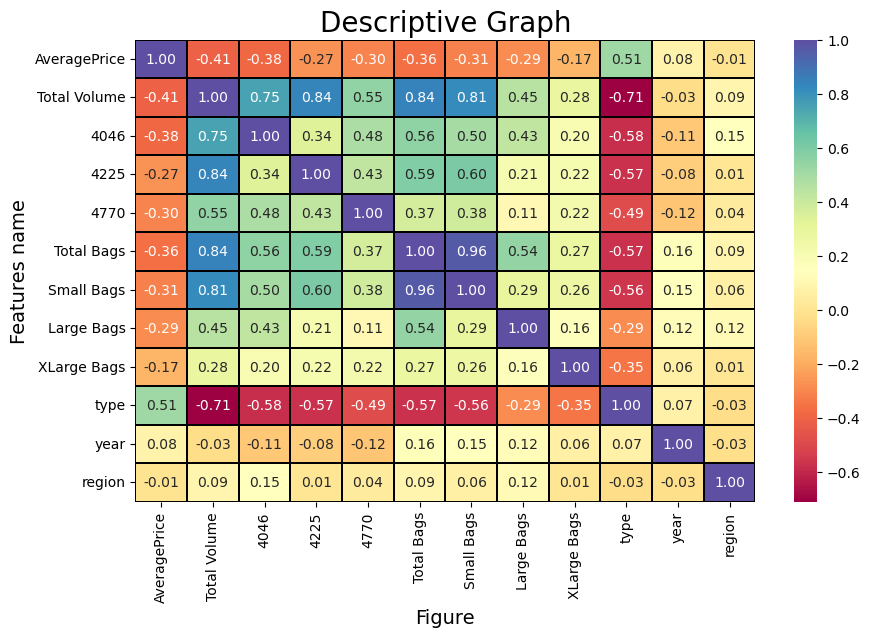

In [29]:
#Let's visualize it using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')    #here 0.2f refers to how much digits can be present after the decimal point
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features name', fontsize=14)
plt.title('Descriptive Graph', fontsize=20)
plt.show()

In [30]:
df.corr().region.sort_values()

XLarge Bags    -0.034101
year           -0.004417
AveragePrice   -0.003242
type            0.018409
4770            0.021859
4225            0.031576
Small Bags      0.061589
Total Volume    0.073220
Total Bags      0.078641
Large Bags      0.096702
4046            0.160294
region          1.000000
Name: region, dtype: float64

We can see  a slight correlation between features and target which is acceptable.

### Separating Features and Label

#### For Region

In [31]:
#Let's separate features and label
x = df2.drop("region", axis=1)
y = df2["region"]

In [32]:
print(x.shape)
print(y.shape)

(11538, 11)
(11538,)


### Feature scaling using Standard Scaler

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.560680,-0.089681,-0.427319,0.470878,-0.338219,-0.496785,-0.400388,-0.512184,-0.212099,-1.723090,-1.151294
1,-0.504577,-0.176013,-0.435912,0.294088,-0.333913,-0.473214,-0.373732,-0.511746,-0.212099,-1.723090,-1.151294
2,-1.682741,0.408257,-0.433057,1.455950,-0.303355,-0.512860,-0.418991,-0.511162,-0.212099,-1.723090,-1.151294
3,-1.261968,0.046422,-0.425060,0.786447,-0.327880,-0.580895,-0.497352,-0.507996,-0.212099,-1.723090,-1.151294
4,-0.700938,-0.211408,-0.429577,0.279672,-0.326525,-0.570029,-0.487117,-0.501386,-0.212099,-1.723090,-1.151294
...,...,...,...,...,...,...,...,...,...,...,...
11533,0.280865,-0.524695,-0.403366,-0.482331,-0.358611,-0.356828,-0.252496,-0.477175,-0.212099,0.580353,2.030160
11534,0.505277,-0.554089,-0.423644,-0.448070,-0.358611,-0.480231,-0.389241,-0.488243,-0.212099,0.580353,2.030160
11535,0.954102,-0.555208,-0.423639,-0.465697,-0.050390,-0.476463,-0.375597,-0.517451,-0.212099,0.580353,2.030160
11536,1.122411,-0.532716,-0.415680,-0.456183,-0.050784,-0.430544,-0.323648,-0.516656,-0.212099,0.580353,2.030160


We have scaled the data using Standard Scaler to reduce biasness.

### Checking for VIF

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.425724e+00,AveragePrice
1,6.161666e+06,Total Volume
2,9.323959e+05,4046
3,1.616088e+06,4225
4,2.926373e+03,4770
5,5.929300e+11,Total Bags
6,4.587552e+11,Small Bags
7,4.711765e+10,Large Bags
8,6.050419e+05,XLarge Bags
9,2.491140e+00,type


We can see all our values are <10. Let's move ahead.

### Data Modelling

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Creating Train Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=199)

### Classification Algorithms

In [39]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [43]:
#Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8876949740034662
[[74  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  1]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  0  0 ...  0  0 35]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88        81
         1.0       0.76      0.67      0.71        42
         2.0       0.95      0.95      0.95        43
         3.0       0.87      0.84      0.86        82
         4.0       0.94      0.96      0.95        52
         5.0       0.89      0.84      0.86        74
         6.0       0.98      1.00      0.99        42
         7.0       0.93      0.95      0.94        43
         8.0       0.90      0.97      0.94        37
         9.0       0.82      0.83      0.82        48
        10.0       0.85      0.85      0.85        54
        11.0       0.94      0.90      0.92        52
        12.0       0.95      0.93      0.94        44
        13.0       0.87      0.77      0.82        44
        14.0  

In [44]:
#Checking accuracy for Extra Trees Classifier
ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.887001733102253
[[78  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 30]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91        81
         1.0       0.79      0.64      0.71        42
         2.0       0.91      0.95      0.93        43
         3.0       0.94      0.83      0.88        82
         4.0       0.96      0.94      0.95        52
         5.0       0.89      0.80      0.84        74
         6.0       0.95      0.98      0.96        42
         7.0       0.91      0.93      0.92        43
         8.0       0.90      0.97      0.94        37
         9.0       0.79      0.92      0.85        48
        10.0       0.83      0.80      0.81        54
        11.0       0.91      0.92      0.91        52
        12.0       0.98      0.91      0.94        44
        13.0       0.75      0.75      0.75        44
        14.0   

In [45]:
#Checking accuracy for Logistic Regression  
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.3837088388214905
[[37  0  0 ...  0  0  0]
 [ 3  2  0 ...  0  0  0]
 [ 0  0  3 ...  1  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  1  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.28      0.46      0.34        81
         1.0       0.25      0.05      0.08        42
         2.0       0.25      0.07      0.11        43
         3.0       0.64      0.35      0.46        82
         4.0       0.41      0.27      0.33        52
         5.0       0.35      0.45      0.40        74
         6.0       0.83      0.83      0.83        42
         7.0       0.17      0.35      0.23        43
         8.0       0.53      0.97      0.69        37
         9.0       0.33      0.38      0.35        48
        10.0       0.40      0.15      0.22        54
        11.0       0.12      0.06      0.08        52
        12.0       0.50      0.27      0.35        44
        13.0       0.17      0.05      0.07        44
        14.0  

In [46]:
#Checking accuracy for SVC
SV = SVC()
SV.fit(x_train, y_train)
predSV = SV.predict(x_test)
print(accuracy_score(y_test, predSV))
print(confusion_matrix(y_test, predSV))
print(classification_report(y_test, predSV))

0.45788561525129984
[[41  0  0 ...  0  0  0]
 [ 2  1  0 ...  0  0  0]
 [ 0  1 11 ...  0  0  1]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 1  1  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.33      0.51      0.40        81
         1.0       0.12      0.02      0.04        42
         2.0       0.58      0.26      0.35        43
         3.0       0.88      0.37      0.52        82
         4.0       0.72      0.25      0.37        52
         5.0       0.44      0.35      0.39        74
         6.0       0.89      0.95      0.92        42
         7.0       0.59      0.60      0.60        43
         8.0       0.76      0.92      0.83        37
         9.0       0.26      0.21      0.23        48
        10.0       0.32      0.17      0.22        54
        11.0       0.33      0.33      0.33        52
        12.0       0.90      0.43      0.58        44
        13.0       0.43      0.14      0.21        44
        14.0 

In [47]:
#Checking accuracy for Gradient Boosting  Classifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))

0.8221837088388215
[[66  0  0 ...  0  0  0]
 [ 0 26  0 ...  0  0  1]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  1 ...  0  0 33]]
              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83        81
         1.0       0.74      0.62      0.68        42
         2.0       0.93      0.91      0.92        43
         3.0       0.86      0.74      0.80        82
         4.0       0.87      0.90      0.89        52
         5.0       0.80      0.80      0.80        74
         6.0       0.93      0.88      0.90        42
         7.0       0.92      0.81      0.86        43
         8.0       0.90      0.95      0.92        37
         9.0       0.75      0.79      0.77        48
        10.0       0.67      0.76      0.71        54
        11.0       0.83      0.87      0.85        52
        12.0       0.90      0.86      0.88        44
        13.0       0.67      0.73      0.70        44
        14.0  

In [48]:
#Checking accuracy for Ada Boost  Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.05199306759098787
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        81
         1.0       0.00      0.00      0.00        42
         2.0       0.00      0.00      0.00        43
         3.0       0.00      0.00      0.00        82
         4.0       0.00      0.00      0.00        52
         5.0       0.00      0.00      0.00        74
         6.0       0.00      0.00      0.00        42
         7.0       0.00      0.00      0.00        43
         8.0       0.00      0.00      0.00        37
         9.0       0.00      0.00      0.00        48
        10.0       0.00      0.00      0.00        54
        11.0       0.00      0.00      0.00        52
        12.0       0.00      0.00      0.00        44
        13.0       0.00      0.00      0.00        44
        14.0       0.00      0.00      0.00      

In [49]:
#Checking accuracy for Bagging  Classifier
BC = BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test, predBC))

0.844367417677643
[[68  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 20  0]
 [ 0  2  0 ...  0  0 29]]
              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80        81
         1.0       0.83      0.69      0.75        42
         2.0       0.91      0.98      0.94        43
         3.0       0.89      0.79      0.84        82
         4.0       0.89      0.94      0.92        52
         5.0       0.81      0.78      0.79        74
         6.0       0.93      1.00      0.97        42
         7.0       0.86      0.86      0.86        43
         8.0       0.82      1.00      0.90        37
         9.0       0.75      0.83      0.79        48
        10.0       0.73      0.83      0.78        54
        11.0       0.84      0.92      0.88        52
        12.0       0.95      0.86      0.90        44
        13.0       0.79      0.68      0.73        44
        14.0   

In [50]:
#Checking accuracy for KNN
KN = KNeighborsClassifier()
KN.fit(x_train, y_train)
predKN = KN.predict(x_test)
print(accuracy_score(y_test, predKN))
print(confusion_matrix(y_test, predKN))
print(classification_report(y_test, predKN))

0.6041594454072791
[[65  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  3  0 ...  0  0 13]]
              precision    recall  f1-score   support

         0.0       0.52      0.80      0.63        81
         1.0       0.19      0.29      0.23        42
         2.0       0.69      0.72      0.70        43
         3.0       0.60      0.56      0.58        82
         4.0       0.55      0.54      0.54        52
         5.0       0.59      0.58      0.59        74
         6.0       0.97      0.90      0.94        42
         7.0       0.65      0.84      0.73        43
         8.0       0.78      0.95      0.85        37
         9.0       0.43      0.50      0.46        48
        10.0       0.22      0.31      0.26        54
        11.0       0.67      0.87      0.76        52
        12.0       0.81      0.57      0.67        44
        13.0       0.39      0.39      0.39        44
        14.0  

In [51]:
#Checking accuracy for Decision Tree Classification
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test, predDT))
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))

0.767417677642981
[[58  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  1]
 ...
 [ 0  0  0 ...  7  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  1  1 ...  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        81
         1.0       0.61      0.67      0.64        42
         2.0       0.87      0.91      0.89        43
         3.0       0.78      0.70      0.74        82
         4.0       0.87      0.90      0.89        52
         5.0       0.71      0.74      0.73        74
         6.0       0.93      0.98      0.95        42
         7.0       0.83      0.79      0.81        43
         8.0       0.90      0.95      0.92        37
         9.0       0.69      0.73      0.71        48
        10.0       0.69      0.69      0.69        54
        11.0       0.85      0.87      0.86        52
        12.0       0.86      0.70      0.78        44
        13.0       0.65      0.59      0.62        44
        14.0   

Here, we notice that Random Forest Classifier works better with 88.76% accuracy.

### Cross Validation Score

In [52]:
#Checking cv score Random Forest Classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predRFC) - score.mean())

[0.59358752 0.68804159 0.63864818 0.6627655  0.6354573 ]
0.6437000193067741
Difference between Accuracy score and cross validation score is -  0.24399495469669208


In [53]:
#Checking cv score Extra Trees Classifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predET) - score.mean())

[0.61568458 0.65121317 0.5407279  0.55526658 0.57650629]
0.5878797030212473
Difference between Accuracy score and cross validation score is -  0.2991220300810058


In [54]:
#Checking cv score Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predLR) - score.mean())

[0.40121317 0.40727903 0.22053726 0.19375813 0.19202427]
0.28296237282507686
Difference between Accuracy score and cross validation score is -  0.10074646599641363


In [55]:
#Checking cv score SVC
score = cross_val_score(SV,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predSV) - score.mean())

[0.45667244 0.43587522 0.21663778 0.16601647 0.17338535]
0.2897174524974477
Difference between Accuracy score and cross validation score is -  0.16816816275385216


In [61]:
#Checking cv score Gradient Boosting Classifier
score = cross_val_score(GBC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predGBC) - score.mean())

[0.50043328 0.6312825  0.61395147 0.60251409 0.51842219]
0.5733207050503366
Difference between Accuracy score and cross validation score is -  0.24886300378848492


In [57]:
#Checking cv score Ada Boost Classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predABC) - score.mean())

[0.0567591  0.03466205 0.055026   0.06805375 0.07022107]
0.056944391231869854
Difference between Accuracy score and cross validation score is -  -0.004951323640881987


In [58]:
#Checking cv score Bagging Classifier
score = cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predBC) - score.mean())

[0.55372617 0.62261698 0.59098787 0.62418726 0.5752059 ]
0.5933448347618093
Difference between Accuracy score and cross validation score is -  0.2510225829158337


In [59]:
#Checking cv score KNeighbors Classifier
score = cross_val_score(KN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predKN) - score.mean())

[0.49046794 0.4415078  0.27816291 0.18378847 0.21283052]
0.32135152677519024
Difference between Accuracy score and cross validation score is -  0.2828079186320888


In [60]:
#Checking cv score Decision Classifier
score = cross_val_score(DT,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ", accuracy_score(y_test, predDT) - score.mean())

[0.45363951 0.52556326 0.52859619 0.53055917 0.508886  ]
0.5094488254044094
Difference between Accuracy score and cross validation score is -  0.2579688522385716


On the basis of least difference between accuracy and cv score Bagging Classifier works better.

### Hyper Parameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [64]:
#Bagging Classifier
parameters = {'n_estimators' : [1,5,10],
             'max_samples' : [0,1,1.0,2,2.0],
             'max_features' : [1,1.0,2,2.0]
             }

In [65]:
GCV = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [67]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'max_features': [1, 1.0, 2, 2.0],
                         'max_samples': [0, 1, 1.0, 2, 2.0],
                         'n_estimators': [1, 5, 10]})

In [68]:
GCV.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10}

In [69]:
GCV = BaggingClassifier(n_estimators=10,
                        max_features=1.0,
                        max_samples=1.0).fit(x_train, y_train)
GCV.score(x_test, y_test)

0.8405545927209706

In [70]:
Final_model = BaggingClassifier(n_estimators=10,
                        max_features=1.0,
                        max_samples=1.0)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

82.70363951473136


### Saving the model

In [ ]:
# save the model to disk
import pickle

filename = 'Final_model.pkl'
pickle.dump(GCV, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open ('TeslaStock.pkl','rb'))
result = loaded_model.score(x_test, y_test)
print(result*100)

#### For Average Price

In [72]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


### Separating Features and Label

In [73]:
#Let's separate features and label
x = df2.drop("AveragePrice", axis=1)
y = df2["AveragePrice"]

In [74]:
print(x.shape)
print(y.shape)

(11538, 11)
(11538,)


### Creating Train Test Split

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Regression Algorithms

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge

In [78]:
#Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAcuu=acc
        maxRS=i
print("Maximum r2 score is ", maxAccu, "on Random_state ", maxRS)        

Maximum r2 score is  0 on Random_state  299


In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [80]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_LR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score: 0.2957664030706827
R2 Score on training data: 30.184062021847915
Mean Absolute Error: 0.2367846867563468
Mean Squared Error: 0.09056954016736644
Root Mean Squared Error: 0.3009477366044916


In [81]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_RFR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 Score: 0.7810592107740619
R2 Score on training data: 96.89054438626397
Mean Absolute Error: 0.12120465049104559
Mean Squared Error: 0.02815737092143268
Root Mean Squared Error: 0.16780158199919534


In [82]:
KNN = KNeighborsRegressor()
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)
pred_train = KNN.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_KNN))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_KNN))
print('Mean Squared Error:', mean_squared_error(y_test, pred_KNN))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_KNN)))

R2 Score: 0.5243431877237636
R2 Score on training data: 69.98050274938869
Mean Absolute Error: 0.18341190063547083
Mean Squared Error: 0.061172910456383595
Root Mean Squared Error: 0.24733157998198207


In [83]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_GBR))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 Score: 0.6315336450355695
R2 Score on training data: 66.08193825041839
Mean Absolute Error: 0.16808604173159816
Mean Squared Error: 0.04738744144242177
Root Mean Squared Error: 0.2176865669774361


In [84]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_lasso))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score: 0.20253797867431922
R2 Score on training data: 20.118567548443046
Mean Absolute Error: 0.2562126964428102
Mean Squared Error: 0.10255939064442939
Root Mean Squared Error: 0.32024895104344897


In [85]:
ridge = Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ridge))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ridge))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ridge))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score: 0.29580661639144545
R2 Score on training data: 30.18370064546545
Mean Absolute Error: 0.23677378375527605
Mean Squared Error: 0.0905643684431176
Root Mean Squared Error: 0.3009391440858394


In [86]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
pred_DT = DT.predict(x_test)
pred_train = DT.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_DT))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_DT))
print('Mean Squared Error:', mean_squared_error(y_test, pred_DT))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_DT)))

R2 Score: 0.5757952249057592
R2 Score on training data: 100.0
Mean Absolute Error: 0.15865395725014442
Mean Squared Error: 0.05455580589254766
Root Mean Squared Error: 0.2335718431073139


In [87]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_svr))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2 Score: 0.3523352912770503
R2 Score on training data: 37.6656798826428
Mean Absolute Error: 0.2282822870697466
Mean Squared Error: 0.08329437150888491
Root Mean Squared Error: 0.28860764284558527


In [88]:
from sklearn.ensemble import ExtraTreesRegressor 
ext = ExtraTreesRegressor()
ext.fit(x_train, y_train)
pred_ext = ext.predict(x_test)
pred_train = ext.predict(x_train)
print('R2 Score:', r2_score(y_test, pred_ext))
print('R2 Score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ext))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ext))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_ext)))

R2 Score: 0.8153059471007347
R2 Score on training data: 100.0
Mean Absolute Error: 0.10998622183708838
Mean Squared Error: 0.023752992637203926
Root Mean Squared Error: 0.15412005916558663


We can see that of all the models Extra Trees Regressor gives the best result of 81% R2 score.

### Cross Validation Score

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
#Linear Regression
score = cross_val_score(LR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_LR) - score.mean())*100)

[-1.14942700e+00  1.46296728e-01 -4.75749577e-03  2.79810223e-02
  3.19828942e-04]
-0.19591738357121766
Difference between R2 score and cross validation score is: 49.16837866419004


In [91]:
#Random Forest
score = cross_val_score(RFR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_RFR) - score.mean())*100)

[-1.06887343  0.42198166  0.40978145  0.41255745  0.13975635]
0.06304069561760157
Difference between R2 score and cross validation score is: 71.80185151564604


In [92]:
#Gradient Boosting
score = cross_val_score(GBR, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_GBR) - score.mean())*100)

[-0.2684428   0.48267669  0.37602872  0.40959055  0.16801646]
0.2335739257467106
Difference between R2 score and cross validation score is: 39.79597192888589


In [93]:
#KNeighbors
score = cross_val_score(KNN, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_KNN) - score.mean())*100)

[-1.6015725   0.10207939  0.0477095   0.11909951 -0.12782865]
-0.29210255039748706
Difference between R2 score and cross validation score is: 81.64457381212506


In [94]:
#Lasso
score = cross_val_score(lasso, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_lasso) - score.mean())*100)

[-2.98218466  0.16096334 -0.01627092  0.01520807 -0.16965745]
-0.5983883233245565
Difference between R2 score and cross validation score is: 80.09263019988757


In [95]:
#Ridge
score = cross_val_score(ridge, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ridge) - score.mean())*100)

[-1.15147386e+00  1.46178468e-01 -4.63893757e-03  2.79790958e-02
  2.91138716e-04]
-0.1963328196070098
Difference between R2 score and cross validation score is: 49.21394359984552


In [96]:
#Extra Trees
score = cross_val_score(ext, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_ext) - score.mean())*100)

[-6.81580623e-01  4.53150814e-01  4.32469970e-01  4.30071260e-01
 -5.35362623e-04]
0.12671521165382424
Difference between R2 score and cross validation score is: 68.85907354469104


In [97]:
#SVR
score = cross_val_score(svr, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_svr) - score.mean())*100)

[-1.74620088  0.18767648  0.14600987  0.13078594 -0.11687584]
-0.27972088779655685
Difference between R2 score and cross validation score is: 63.205617907360725


In [98]:
#Decision Tree
score = cross_val_score(DT, x, y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is:", (r2_score(y_test, pred_DT) - score.mean())*100)

[-2.09843712 -0.14607854 -0.11204794  0.01319199 -0.35789169]
-0.5402526606665108
Difference between R2 score and cross validation score is: 111.604788557227


In this case Gradient Boosting Regressor works better with least difference between R2 score and CV score.

Let's perform hyper parameter tuning to improve our score.

### Hyper Parameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [103]:
#Gradient Boosting Regressor
parameters = {'max_depth' : [0,1,2,3],
             'learning_rate' : [0,1, 1.0, 2, 2.0],
             'n_estimators' : [50, 100, 200, 300]}

In [104]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

In [105]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0, 1, 1.0, 2, 2.0],
                         'max_depth': [0, 1, 2, 3],
                         'n_estimators': [50, 100, 200, 300]})

In [106]:
GCV.best_params_

{'learning_rate': 1.0, 'max_depth': 2, 'n_estimators': 100}

In [107]:
final_scores = GradientBoostingRegressor(n_estimators=100, 
                                 learning_rate=1.0,
                                 max_depth=2,
                                 random_state=0).fit(x_train, y_train)
final_scores.score(x_test, y_test)

0.6714940330523215

In [108]:
pred = final_scores.predict(x_test)
print('R2 score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.6714940330523215
Mean Absolute Error: 0.15999334238737714
Mean Squared Error: 0.04224824617629474
Root Mean Squared Error: 0.2055437816531912


We got 67% R2 score as our final score.

### Documentation

- We imported necessary libraries.
- Imported Data set.
- Performed EDA and all the steps.
- Visualized the data.
- Checked for Outliers.
- Applied Z Score.
- Applied IQR methods.
- Removed unwanted columns such as Date and Unnamed.
- Checked for skewness and reduced them using transformation methods.
- Checked for the data distribution in each columns.
- Separated features and label.
- Created Train Test Split.
- Started modelling the data.
- Imported certain Classification Algorithms.
- Checked for Accuracy score of each model.
- Checked for CV score of each model.
- We did hyper parameter tuning for our best model.
- Saved the model.

* For Average Price:
- We imported the data set which was already sorted.
- Separated features and label.
- Created Train Test Split.
- Started data modelling.
- Imported certain Regression Algorithms.
- Checked for R2 score of each model.
- Checked for CV score of each model.
- Did hyper parameter tuning for the best model.
- Got the result 67% in our final model.

Done!!!